In [1]:
# Setup display width, load packages, import symbols
ENV["COLUMNS"]=72
using Pkg; for p in ("Knet","Plots"); haskey(Pkg.installed(),p) || Pkg.add(p); end
using Base.Iterators: flatten
using Statistics: mean
using Knet: Knet, conv4, pool, mat, KnetArray, nll, zeroone, progress, sgd, param, param0, dropout, relu, Data, load, minibatch
using Statistics
using Random

In [2]:
Pkg.add("ImageMagick")


  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [3]:
Pkg.status()

    Status `~/.julia/environments/v1.1/Project.toml`
  [6710c13c] AutoGrad v1.1.3
  [5ae59095] Colors v0.9.5
  [5789e2e9] FileIO v1.0.5
  [7073ff75] IJulia v1.17.0
  [6218d12a] ImageMagick v0.7.1
  [916415d5] Images v0.17.2
  [1902f260] Knet v1.2.1
  [91a5bcdd] Plots v0.23.2


In [4]:
using Images, Colors

In [5]:
cd()
A=cd(readdir, "/home/tugcenum/Downloads/Data-20190317T000335Z-001/Data/Anger")
pwd()

"/home/tugcenum"

In [6]:
cd()
cd("Downloads/Data-20190317T000335Z-001/Data/Anger")
img= load(A[2])
imgg=convert(Array{Float32}, img)
imggg=reshape(imgg,(256*256))
X=imggg
Y=[1]
for k=2:size(A,1)
img= load(A[k])
imgg=convert(Array{Float32}, img)
imggg=reshape(imgg,(256*256))
    X=cat(X,imggg;dims=2)
    Y=push!(Y,1)
end

In [7]:
summary(X)

"65536×240 Array{Float32,2}"

In [8]:
cd()
D=cd(readdir, "/home/tugcenum/Downloads/Data-20190317T000335Z-001/Data/Disgust");


In [9]:
cd()
cd("Downloads/Data-20190317T000335Z-001/Data/Disgust")
for k=1:size(D,1)
img= load(D[k])
imgg=convert(Array{Float32}, img)
    imggg=reshape(imgg,(256*256))
     X=cat(X,imggg;dims=2)
    Y=push!(Y,2)
end

In [10]:
summary(X)

"65536×480 Array{Float32,2}"

In [11]:
cd()
F=cd(readdir, "/home/tugcenum/Downloads/Data-20190317T000335Z-001/Data/Fear")


240-element Array{String,1}:
 "F1.png"  
 "F10.png" 
 "F100.png"
 "F101.png"
 "F102.png"
 "F103.png"
 "F104.png"
 "F105.png"
 "F106.png"
 "F107.png"
 "F108.png"
 "F109.png"
 "F11.png" 
 ⋮         
 "F89.png" 
 "F9.png"  
 "F90.png" 
 "F91.png" 
 "F92.png" 
 "F93.png" 
 "F94.png" 
 "F95.png" 
 "F96.png" 
 "F97.png" 
 "F98.png" 
 "F99.png" 

In [12]:
cd()
cd("Downloads/Data-20190317T000335Z-001/Data/Fear")
for k=1:size(F,1)
img= load(F[k])
imgg=convert(Array{Float32}, img)
     imggg=reshape(imgg,(256*256))
     X=cat(X,imggg;dims=2)
    Y=push!(Y,3)
end

In [13]:
summary(X)

"65536×720 Array{Float32,2}"

In [14]:
cd()
H=cd(readdir, "/home/tugcenum/Downloads/Data-20190317T000335Z-001/Data/Happiness");
cd()
cd("Downloads/Data-20190317T000335Z-001/Data/Happiness")
for k=1:size(H,1)
img= load(H[k])
imgg=convert(Array{Float32}, img)
  imggg=reshape(imgg,(256*256))
     X=cat(X,imggg;dims=2)
    Y=push!(Y,4)
end

In [15]:
summary(X)

"65536×960 Array{Float32,2}"

In [16]:
cd()
S=cd(readdir, "/home/tugcenum/Downloads/Data-20190317T000335Z-001/Data/Sadness");
cd()
cd("Downloads/Data-20190317T000335Z-001/Data/Sadness")
for k=1:size(S,1)
img= load(S[k])
imgg=convert(Array{Float32}, img)
    imggg=reshape(imgg,(256*256))
     X=cat(X,imggg;dims=2)
    Y=push!(Y,5)
end

In [17]:
summary(X)

"65536×1200 Array{Float32,2}"

In [18]:
cd()
P=cd(readdir, "/home/tugcenum/Downloads/Data-20190317T000335Z-001/Data/Surprise")

240-element Array{String,1}:
 "P1.png"  
 "P10.png" 
 "P100.png"
 "P101.png"
 "P102.png"
 "P103.png"
 "P104.png"
 "P105.png"
 "P106.png"
 "P107.png"
 "P108.png"
 "P109.png"
 "P11.png" 
 ⋮         
 "P89.png" 
 "P9.png"  
 "P90.png" 
 "P91.png" 
 "P92.png" 
 "P93.png" 
 "P94.png" 
 "P95.png" 
 "P96.png" 
 "P97.png" 
 "P98.png" 
 "P99.png" 

In [19]:
cd()
P=cd(readdir, "/home/tugcenum/Downloads/Data-20190317T000335Z-001/Data/Surprise");
cd()
cd("Downloads/Data-20190317T000335Z-001/Data/Surprise")
for k=1:size(P,1)
img= load(P[k])
imgg=convert(Array{Float32}, img)
     imggg=reshape(imgg,(256*256))
     X=cat(X,imggg;dims=2)
    Y=push!(Y,6)
end

In [20]:
Y=convert(Array{UInt8}, Y);

In [21]:
summary(Y)

"1440-element Array{UInt8,1}"

In [22]:
summary(X)

"65536×1440 Array{Float32,2}"

In [23]:
ind=randperm(size(Y,1));

In [24]:
Ynew=Y[ind,1];

In [25]:
Xnew=X[:,ind];

In [26]:
summary(Xnew)

"65536×1440 Array{Float32,2}"

In [27]:
Xdtrn=Xnew[:,1:1296]

Ydtrn=Ynew[1:1296];

In [28]:
summary(Xdtrn)

"65536×1296 Array{Float32,2}"

In [29]:
dtrn=minibatch(Xdtrn,Ydtrn,60)

Data{Tuple{Array{Float32,2},Array{UInt8,1}}}(Float32[0.623529 0.545098 … 0.521569 0.341176; 0.623529 0.545098 … 0.521569 0.341176; … ; 0.184314 0.380392 … 0.247059 0.533333; 0.184314 0.380392 … 0.247059 0.533333], UInt8[0x04 0x03 … 0x01 0x03], 60, 1296, false, 1237, 1:1296, false, (65536, 1296), (1296,), Array{Float32,2}, Array{UInt8,1})

In [30]:
(x,y) = first(dtrn)
println.(summary.((x,y)));

65536×60 Array{Float32,2}
60-element Array{UInt8,1}


In [31]:
Xtst=Xnew[:,1297:1440];

Ytst=Ynew[1297:1440];

In [32]:
dtst=minibatch(Xtst,Ytst,60)

Data{Tuple{Array{Float32,2},Array{UInt8,1}}}(Float32[0.705882 0.513726 … 0.541176 0.662745; 0.705882 0.513726 … 0.541176 0.662745; … ; 0.454902 0.337255 … 0.27451 0.431373; 0.454902 0.337255 … 0.27451 0.431373], UInt8[0x03 0x04 … 0x03 0x06], 60, 144, false, 85, 1:144, false, (65536, 144), (144,), Array{Float32,2}, Array{UInt8,1})

In [33]:
(x,y) = first(dtrn)
println.(summary.((x,y)));

65536×60 Array{Float32,2}
60-element Array{UInt8,1}


In [34]:
# Set display width, load packages, import symbols
ENV["COLUMNS"]=72
using Pkg; for p in ("Knet","Plots","Images"); haskey(Pkg.installed(),p) || Pkg.add(p); end
using Knet: Knet, dir,sigm , zeroone, progress, sgd, load, save, gc, Param, KnetArray, gpu, Data, nll, training, dropout,conv4, pool, mat, nll, zeroone,
progress, sgd, param, param0, dropout, relu, Data,sigm, Adam # param, param0, xavier
using Statistics: mean
using Base.Iterators: flatten
using Plots; default(fmt=:png,ls=:auto)
import Knet.param0
import Knet.param
import Knet.xavier

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186


In [35]:
# Some utilities to make model definitions easier:
param(d...; init=xavier, atype=atype())=Param(atype(init(d...)))
param0(d...; atype=atype())=param(d...; init=zeros, atype=atype)
xavier(o,i) = (s = sqrt(2/(i+o)); 2s .* rand(o,i) .- s)
atype()=(gpu() >= 0 ? KnetArray{Float32} : Array{Float32})

atype (generic function with 1 method)

In [36]:
function trainresults(file,model; o...)
    if (print("Train from scratch? "); readline()[1]=='y')
        takeevery(n,itr) = (x for (i,x) in enumerate(itr) if i % n == 1)
        r = ((model(dtrn), model(dtst), zeroone(model,dtrn), zeroone(model,dtst))
             for x in takeevery(length(dtrn), progress(sgd(model,repeat(dtrn,100)))))
        r = reshape(collect(Float32,flatten(r)),(4,:))
        Knet.gc() # To save gpu memory
    else
        isfile(file) || download("http://people.csail.mit.edu/deniz/models/tutorial/$file",file)
        r = Knet.load(file,"results")
    end
    println(minimum(r,dims=2))
    return r
end

trainresults (generic function with 1 method)

In [37]:
# Let's define a chain of layers
struct Chain
    layers
    Chain(layers...) = new(layers)
end
(c::Chain)(x) = (for l in c.layers; x = l(x); end; x)
(c::Chain)(x,y) = nll(c(x),y)
(c::Chain)(d::Data) = mean(c(x,y) for (x,y) in d)

In [38]:
struct Layer0; w; b; end
Layer0(i::Int,o::Int) = Layer0(param(o,i),param0(o))
(l::Layer0)(x) = (l.w * x .+ l.b)

In [39]:
model=Chain(Layer0(65536,6))
lin1 = trainresults("mlp1.jld2", model);

Train from scratch? stdin> y
1.02e+02  100.00%┣████████████████████┫ 2100/2100 [01:18/01:18, 27.02i/s]
Float32[22.1392; 49.8861; 0.252381; 0.375]


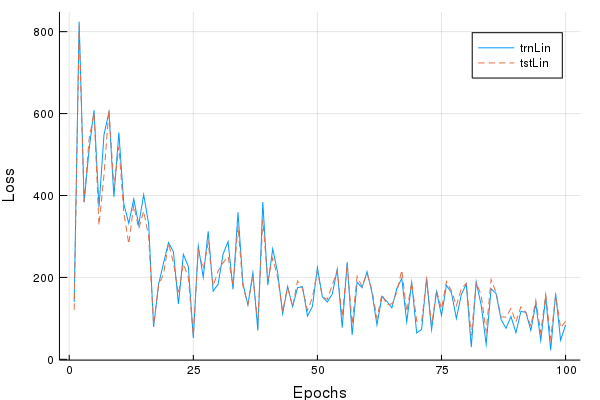

In [40]:
plot([lin1[1,:], lin1[2,:]],
     labels=[:trnLin :tstLin],xlabel="Epochs",ylabel="Loss")

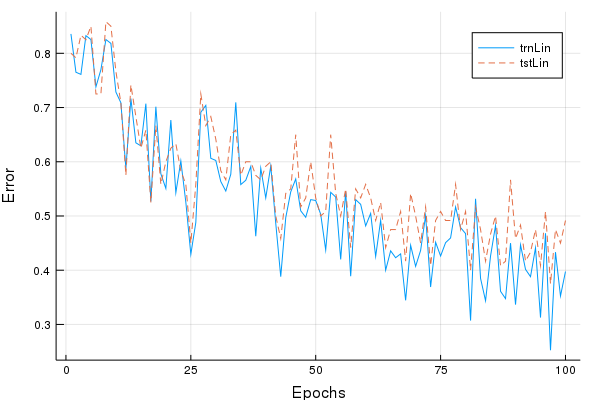

In [41]:
plot([lin1[3,:], lin1[4,:]],
     labels=[:trnLin :tstLin],xlabel="Epochs",ylabel="Error")

In [51]:
k=model.layers

(Layer0(P(Array{Float32,2}(6,65536)), P(Array{Float32,1}(6))),)

In [76]:
cd()
cd("Downloads/Data-20190317T000335Z-001/Data")
pwd()

"/home/tugcenum/Downloads/Data-20190317T000335Z-001/Data"

In [82]:
using DelimitedFiles
writedlm( "Loss1.csv",  lin1[2,:])

In [75]:
pwd()

"/home/tugcenum"

In [70]:
save("Loss1.jld2","results",lin1[2,:])

In [79]:
a=first(k)
B=a.b

6-element Param{Array{Float32,1}}:
 -0.022947535
  0.16331743 
  0.42501777 
 -0.43897742 
  0.08530485 
 -0.2117235  